# Grabbing Nox Player

'nox_size' : (720, 1280)

스크린샷 경로 : C:\Users\KH_Home\Nox_share\ImageShare\Screenshots

In [ ]:
import cv2
import time
import matplotlib.pyplot as plt
import numpy as np
import sys
import win32api, win32con, win32gui
from PIL import Image
from mss import mss

from configs import *

In [1]:
from rok_launcher import NoxManager

In [2]:
config = {
    'nox_size' : (720, 1280)
}

-------------------------------------
Run Nox Application and Press Any Key
Now Find Nox Position


Refining Nox Position


Finished


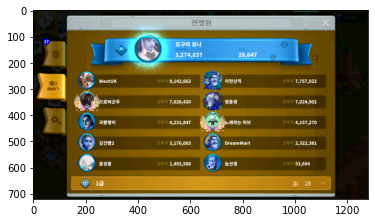

In [3]:
manager = NoxManager(config=config, verbose=False)

# manager 로 실행

In [ ]:
manager.capture_R4()

In [ ]:
manager.capture_R3()

In [ ]:
manager.capture_R2()

In [ ]:
manager.capture_R1()

# 연맹창 열기

In [ ]:
img_dict

# R4 체크

In [ ]:
for r4m_pos in R4_pos_U:
    manager.click_relative_pos(r4m_pos)
    time.sleep(0.5)
    profile_pos, diff = manager.get_relative_pos(img_dict['4menus'], div=1)
    print(diff)
    if diff < 0.04:
        manager.click_relative_pos(profile_pos)
        time.sleep(0.5)
        manager.capture()
        time.sleep(0.5)
        manager.click_relative_pos(profile_close_pos)
        time.sleep(0.5)

In [ ]:
R3_pos, R3_diff = manager.get_relative_pos(img_dict['R3'])
print(R3_pos, R3_diff)

if R3_pos[0] > R3_thr:
    for r4m_pos in R4_pos_D:
        manager.click_relative_pos(r4m_pos)
        time.sleep(0.5)
        profile_pos, diff = manager.get_relative_pos(img_dict['4menus'], div=1)
        print(diff)
        if diff < diff_thr:
            manager.click_relative_pos(profile_pos)
            time.sleep(0.5)
            manager.capture()
            time.sleep(0.5)
            manager.click_relative_pos(profile_close_pos)
            time.sleep(0.5)

# R3 체크

In [ ]:
def capture_members(verbose=False):
    for m_pos in members_pos:
        manager.click_relative_pos(m_pos)
        time.sleep(0.5)
        profile_pos, diff = manager.get_relative_pos(img_dict['7menus'], div=2)
        if verbose:
            print('profile_diff: ',diff)
        if diff < 0.04:
            manager.click_relative_pos(profile_pos)
            time.sleep(0.5)
            manager.capture()
            time.sleep(0.5)
            manager.click_relative_pos(profile_close_pos)
            time.sleep(0.5)

In [ ]:
manager.click_relative_pos(R3_pos)
time.sleep(0.3)
manager.relative_drag(R3_pos, np.array([r3r2_H_to, R3_pos[1]]), delay=1.0)

last_line = False
max_cnt = 20
cnt = 0

In [ ]:
# 멤버수가 4명,6명 보다 적은경우 에러가 날 수 있음
while(not last_line and cnt<max_cnt):
    capture_members()
            
    manager.relative_drag(md_drag_from4, md_drag_to4, delay=1.0)
    R1_pos, R1_diff = manager.get_relative_pos(img_dict['R1'])
    print('R1 diff : ',R1_diff)
    if R1_diff < diff_thr:
        last_line = True
        capture_members()
    cnt += 1

# R2 체크

In [ ]:
R2_pos, R2_diff = manager.get_relative_pos(img_dict['R2'])
print(R2_pos, R2_diff)

manager.click_relative_pos(R2_pos)
time.sleep(0.3)
manager.relative_drag(R2_pos, np.array([r3r2_H_to, R2_pos[1]]), delay=1.0)

last_line = False
max_cnt = 20
cnt = 0

In [ ]:
# 멤버수가 4명,6명 보다 적은경우 에러가 날 수 있음
while(not last_line and cnt<max_cnt):
    capture_members()
            
    manager.relative_drag(md_drag_from4, md_drag_to4, delay=1.0)
    R1_pos, R1_diff = manager.get_relative_pos(img_dict['R1'])
    print('R1 diff : ',R1_diff)
    if R1_diff < diff_thr:
        last_line = True
        capture_members()
    cnt += 1

# R1 체크

In [ ]:
R1_pos, R1_diff = manager.get_relative_pos(img_dict['R1'])
print(R1_pos, R1_diff)

manager.click_relative_pos(R1_pos)
time.sleep(0.3)
manager.relative_drag(R1_pos, np.array([r3r2_H_to, R1_pos[1]]), delay=1.0)

last_line = False
max_cnt = 20
cnt = 0

## break condition 생각해봐야됨
### 같은 멤버가 또 나오는지 체크를 해봐야 되는데 생각보다 쉽지 않다, 글자로만 비교해야되기때문
### 차라리 숫자 OCR을 하고 몇명을 체크해야되는지를 알아보는게 더 나을수도있다

In [ ]:
# 멤버수가 4명,6명 보다 적은경우 에러가 날 수 있음
while(not last_line and cnt<max_cnt):
    capture_members()
            
    manager.relative_drag(md_drag_from4, md_drag_to4, delay=1.0)
    R1_pos, R1_diff = manager.get_relative_pos(img_dict['R1'])
    print('R1 diff : ',R1_diff)
    if R1_diff < diff_thr:
        last_line = True
        capture_members()
    cnt += 1

In [ ]:
manager.relative_drag(md_drag_from4, md_drag_to4, delay=1.0)
R1_pos, R1_diff = manager.get_relative_pos(img_dict['R1'])
print(R1_pos, R1_diff)
if R1_diff < diff_thr:
    last_line = True

In [ ]:
R3_pos, R3_diff = manager.get_relative_pos(img_dict['R2'])
print(R3_pos, R3_diff)

# Debug

In [ ]:
from util import *

In [ ]:
sct = mss()
screen = get_screen(sct, sct.monitors[2])

nox_img = cv2.imread('./images/nox.PNG')
nox_pos = find_img_pos(screen, nox_img, interval=10, verbose=True)
print(nox_pos)

In [ ]:
img_path = './images/'
tmp_imgs = ['nox.PNG', 'menu.PNG', 'alliance.PNG', 'R1.PNG',
           'R2.PNG', 'R3.PNG', 'R4.PNG', 'info.PNG', '4menus.PNG', '7menus.PNG']
imgs = []
for img in tmp_imgs:
    imgs.append(img_path+img)

In [ ]:
screen.shape

In [ ]:
idx = -2
sct = mss()
screen = get_screen(manager.sct, manager.nox_monitor)
img = cv2.imread(imgs[idx])
print(imgs[idx])
img_pos, diff = manager.get_relative_pos(img, div=1)
print(img_pos, diff)

In [ ]:
manager.click_relative_pos(img_pos[0])

In [ ]:
get_mouse_pos()

In [ ]:
manager.monitor

In [ ]:
manager.nox_pos + img_pos[0][0]

In [ ]:
click(manager.nox_pos + img_pos[0][0])

In [ ]:
manager.get_relative_mouse_pos()

In [ ]:
manager.get_relative_mouse_pos()

In [ ]:
manager.get_relative_mouse_pos()

In [ ]:
manager.get_relative_mouse_pos()

In [ ]:
manager.get_relative_mouse_pos()

In [ ]:
manager.get_relative_mouse_pos()

In [ ]:
manager.get_relative_mouse_pos()

In [ ]:
manager.get_relative_mouse_pos()

In [ ]:
manager.get_relative_mouse_pos()

In [ ]:
manager.get_relative_mouse_pos()

In [ ]:
manager.get_relative_mouse_pos()

In [ ]:
manager.get_relative_mouse_pos()

In [ ]:
manager.get_relative_mouse_pos()

In [ ]:
manager.get_relative_mouse_pos()

In [ ]:
manager.get_relative_mouse_pos()

In [ ]:
manager.nox_monitor

In [ ]:
import mss.tools

In [ ]:
r1_monitor = manager.nox_monitor.copy()
r1_monitor['left'] += 170
r1_monitor['top'] += 610
r1_monitor['width'] = 400
r1_monitor['height'] = 80

screen = get_screen(manager.sct, r1_monitor)
plt.imshow(screen)

sct_img = manager.sct.grab(r1_monitor)
mss.tools.to_png(sct_img.rgb, sct_img.size, output='./images/r1_lastline.PNG')

r1_monitor10 = r1_monitor.copy()
r1_monitor10['left'] -= 10
r1_monitor10['top'] -= 10
r1_monitor10['width'] += 10
r1_monitor10['height'] += 10

In [ ]:
screen = get_screen(manager.sct, r1_monitor10)
plt.imshow(screen)

In [ ]:
screen.shape

In [ ]:
r1_lastline.shape

In [ ]:
r1_lastline = cv2.imread('./images/r1_lastline.PNG')
plt.imshow(r1_lastline)
plt.show()
screen = get_screen(manager.sct, r1_monitor10)
plt.imshow(screen)
plt.show()
_, img_diff = find_img_pos(screen, r1_lastline, interval=1)
img_diff

In [ ]:
r1_monitor

In [ ]:
manager.nox_monitor

In [ ]:
screen = get_screen(manager.sct, r1_monitor_tmp)
r1_lastline = cv2.imread('./images/r1_lastline.PNG')
plt.imshow(r1_lastline)
_, img_diff = find_img_pos(screen, r1_lastline, interval=1)
img_diff

In [ ]:
img = cv2.imread('./images/4menus.PNG')
print(img.shape)
plt.imshow(img)

In [ ]:
sct_img = manager.sct.grab(r1_monitor)


In [ ]:
plt.imshow(sct_img)

In [ ]:
tmp_monitor = manager.nox_monitor.copy()
tmp_monitor['left'] += 1340
tmp_monitor['top'] += 110
tmp_monitor['width'] = 60
tmp_monitor['height'] = 70

screen = get_screen(manager.sct, tmp_monitor)

plt.imshow(screen)

In [ ]:
img = cv2.imread('./images/capture.PNG')
plt.imshow(img)
find_img_pos(screen, img, dist=None, interval=1, verbose=False)

In [ ]:
R4_pos = [[335, 220],
          [335, 460],
          [335, 700],
          [335, 930],
          [480, 220],
          [480, 460],
          [480, 700],
          [480, 930]]

In [ ]:
members_pos = [[258, 200],
               [338, 200],
               [413, 200],
               [497, 200],
               [258, 680],
               [338, 680],
               [413, 680],
               [497, 680]]

# 마우스 움직임 체크

In [ ]:
img_path = './images/'
tmp_imgs = ['nox.PNG', 'menu.PNG', 'alliance.PNG', 'R1.PNG',
           'R2.PNG', 'R3.PNG', 'R4.PNG', 'info.PNG', '4menus.PNG', '7menus.PNG']
imgs = []
for img in tmp_imgs:
    imgs.append(img_path+img)

In [ ]:
for pos in R4_pos:
    pos += manager.nox_pos
    x, y = pos[1], pos[0]
    win32api.SetCursorPos((x, y))
    time.sleep(0.5)

# R3 찾고 드래그

In [ ]:
idx = 5
sct = mss()
screen = get_screen(manager.sct, manager.nox_monitor)
img = cv2.imread(imgs[idx])
print(imgs[idx])
img_pos, diff = manager.get_relative_pos(img)
img_pos = img_pos[0]
print(img_pos, diff)

In [ ]:
manager.click_relative_pos(img_pos)
time.sleep(0.3)
manager.relative_drag(img_pos, np.array([170, img_pos[1]]), delay=1.0)
print(manager.get_relative_mouse_pos())

# 멤버 찾기 마우스 움직임 체크(마지막줄 주의)
## R2를 누를수도 있음 주의!!

In [ ]:
for pos in members_pos:
    pos += manager.nox_pos
    x, y = pos[1], pos[0]
    win32api.SetCursorPos((x, y))
    time.sleep(0.5)

# 멤버 드래그

In [ ]:
manager.relative_drag(np.array([500, 200]), np.array([170, 200]), delay=1.0)
print(manager.get_relative_mouse_pos())

In [ ]:
win32api.mouse_event(win32con.MOUSEEVENTF_MOVE, -100, -100, 0, 0)

# ???